### Customer Satisfaction Prediction for Airlines

### Business Problem

Airlines face significant challenges in retaining customers and ensuring satisfaction. Dissatisfied customers are more likely to switch to competitors, leading to revenue loss. This notebook aims to solve the customer satisfaction prediction problem by building a machine learning model that predicts whether a customer is satisfied or dissatisfied based on various features such as travel type, customer type, and flight class.

By accurately predicting customer satisfaction, airlines can:

1.Identify dissatisfied customers and take proactive measures to improve their experience.
2.Focus on key factors influencing satisfaction to enhance overall service quality.
3.Improve customer retention and loyalty.

### Objective 

The goal is to develop a machine learning model using the XGBoost Classifier to predict customer satisfaction. The model is optimized using hyperparameter tuning and evaluated on various performance metrics.

 ### 1. Import Libraries
The following libraries are used for data manipulation, visualization, and machine learning:

In [ ]:

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

 ### Load the Dataset
The dataset is loaded from a CSV file containing customer feedback and flight details:

In [ ]:
file_path='/content/airline.csv'
airline_data = pd.read_csv(file_path)

Preview the Data

In [ ]:
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


Dataset Information

In [ ]:
airline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

### Display the data type for each column

Next, observe the types of data present within this dataset.

In [ ]:
airline_data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


### Check for missing values 

In [ ]:
airline_data.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


### 3. Data Preprocessing 
### 3.1 Handle Missing Values

In [ ]:

airline_data = airline_data.dropna(axis=0).reset_index(drop=True)
airline_data.isna().sum()

,0
satisfaction,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0
Gate location,0


### 3.2 Data Types

In [ ]:
airline_data.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


### 3.3 One-Hot Encoding

In [ ]:
airline_data_dummies = pd.get_dummies(airline_data,
                                         columns=['satisfaction','Customer Type','Type of Travel','Class'])

### 3.4 Target Variable Distribution

In [ ]:
airline_data['satisfaction'].value_counts()*100/len(airline_data_dummies)

,count
satisfaction,
satisfied,54.74063
dissatisfied,45.25937


In [ ]:
airline_data_dummies['satisfaction_dissatisfied'].value_counts()*100/len(airline_data_dummies)

,count
satisfaction_dissatisfied,
False,54.73283
True,45.26717


### 4. Define Feature and Target

In [ ]:
# Define the y (target) variable.

### YOUR CODE HERE ###
y = airline_data_dummies['satisfaction_satisfied']

# Define the X (predictor) variables.

### YOUR CODE HERE ###
X = airline_data_dummies.drop(['satisfaction_satisfied','satisfaction_dissatisfied'], axis = 1)

### 5. Split The Data 

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 6. Model Training

In [ ]:
# Define xgb to be your XGBClassifier.

### YOUR CODE HERE ###

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

### 6.1 Hyperparameter Tuning 

In [ ]:
cv_params = {
    'max_depth': [4, 6],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [5, 10, 15],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

# Split the dataset into training and testing sets.
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}


### GridSearch Construction

In [ ]:
# Construct your GridSearch.

### YOUR CODE HERE ###

xgb_cv = GridSearchCV(xgb,
                      cv_params,
                      scoring = scoring,
                      cv = 5,
                      refit = 'f1'
                     )

### 6.3 Train the Model

In [ ]:
%%time
# fit the GridSearch model to training data
xgb_cv = xgb_cv.fit(X_train, y_train)
xgb_cv

CPU times: user 2min 11s, sys: 398 ms, total: 2min 11s
Wall time: 1min 18s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [4, 6],
                         'min_child_weight': [3, 5],
                         'n_estimators': [5, 10, 15], 'subsample': [0.7]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1',
                      'precision': 'precision', 'recall': 'recall'})

### 7. Save the Model

In [ ]:
# Use `pickle` to save the trained model.
pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

### 8. Model Evaluation

In [ ]:
# Apply your model to predict on your test data. Call this output "y_pred".
y_pred = xgb_cv.predict(X_test)

### 8.2 Performance Metrics

In [ ]:
# 1. Print your accuracy score.

ac_score = metrics.accuracy_score(y_test, y_pred)
print('accuracy score:', ac_score)

# 2. Print your precision score.

pc_score = metrics.precision_score(y_test, y_pred)
print('precision score:', pc_score)

# 3. Print your recall score.
rc_score = metrics.recall_score(y_test, y_pred)
print('recall score:', rc_score)

# 4. Print your f1 score.

f1_score = metrics.f1_score(y_test, y_pred)
print('f1 score:', f1_score)

accuracy score: 0.93717277486911
precision score: 0.9477231536021749
recall score: 0.9374229691876751
f1 score: 0.9425449219850166


### 8.3 Confusion Matrix

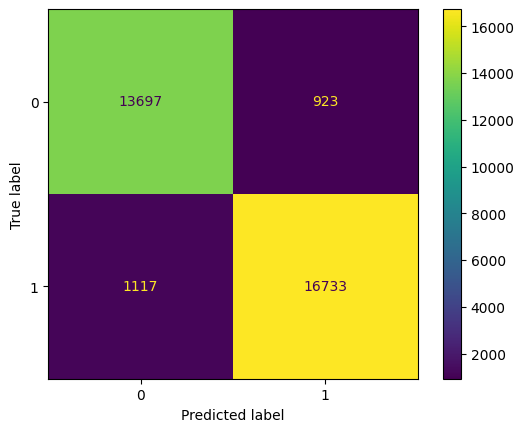

In [ ]:
# Construct and display your confusion matrix.

# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_pred)
# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_cv.classes_)
# Plot the visual in-line.
disp.plot()

### 9. Feature Importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

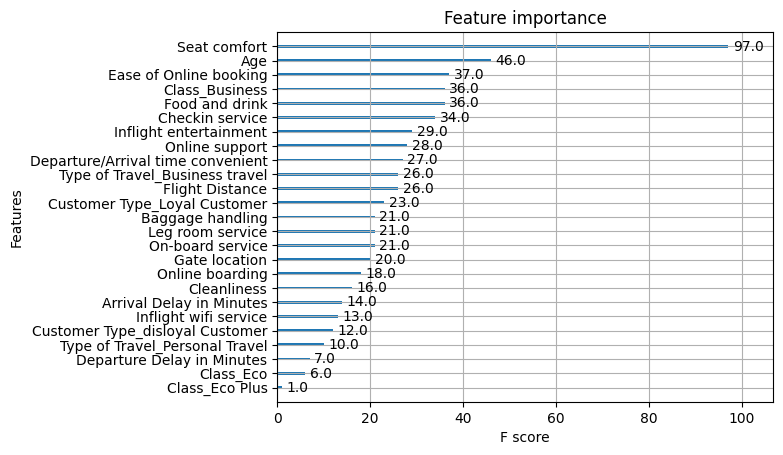

In [ ]:
# Plot the relative feature importance of the predictor variables in your model.
plot_importance(xgb_cv.best_estimator_)

### 10. Model Comparison

In [ ]:
# Create a table of results to compare model performance.

### YOUR CODE HERE ###
table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.945422, 0.947306, f1_score],
                      'Recall': [0.935863, 0.944501, rc_score],
                      'Precision': [0.955197, 0.950128, pc_score],
                      'Accuracy': [0.940864, 0.942450, ac_score]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.945422,0.935863,0.955197,0.940864
1,Tuned Random Forest,0.947306,0.944501,0.950128,0.942450
2,Tuned XGBoost,0.939560,0.932717,0.946504,0.934031


### Summary
his notebook demonstrates the development of a machine learning model to predict customer satisfaction for airlines. The XGBoost classifier is tuned for optimal performance and evaluated using various metrics. The results show that the model can effectively predict customer satisfaction, enabling airlines to take proactive measures to improve customer experience and retention.

### Key Takeaways
The XGBoost model achieved high accuracy, precision, recall, and F1 scores.
Feature importance analysis highlights the key factors influencing customer satisfaction.
The model can be deployed to identify dissatisfied customers and improve service quality.
